## Observations and Insights 

In [157]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [129]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [72]:
# Checking the number of mice

total_mice = mouse_metadata_df["Mouse ID"].count()
total_mice

249

In [42]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [69]:
mouse_data_complete_df = pd.merge(mouse_metadata_df,study_results_df , how="outer", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

In [70]:
clean_mouse_data_complete_df = mouse_data_complete_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
clean_mouse_data_complete_df.shape

(1888, 8)

In [73]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete_df["Mouse ID"].count()

1888

In [93]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



# tumor volume and regimen

In [140]:
drug_regimen_df =clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)","Timepoint"]] 
drug_regimen_df.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20


In [141]:
drug_regimen_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [142]:
df = drug_regimen_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,45.000000,0
Ramicane,k403,38.825898,5
Ramicane,k403,35.014271,10
Ramicane,k403,34.223992,15
Ramicane,k403,32.997729,20


In [143]:
tumor_regimen_df.columns

Index(['Drug Regimen', 'Tumor Volume (mm3)'], dtype='object')

In [144]:
tumor_regimen_ramicane_df = df.loc["Ramicane"]
average = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].mean()
average

Tumor Volume (mm3)    40.216745
dtype: float64

In [145]:
median = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].median()
median

Tumor Volume (mm3)    40.673236
dtype: float64

In [102]:
variance = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].var()
variance

Tumor Volume (mm3)    23.486704
dtype: float64

In [146]:
standard_deviation = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].std()
standard_deviation

Tumor Volume (mm3)    4.846308
dtype: float64

In [147]:
sem = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].sem()
sem

Tumor Volume (mm3)    0.320955
dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [148]:
summary_statistics_df = pd.DataFrame({"Mean": [40.216745],
                                     "Median": [40.673236],
                                     "Variance": [23.486704],
                                     "Standard Deviation": [4.846308],
                                     "SEM": [0.320955]
})
summary_statistics_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
0,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

In [161]:
making_plots_df = clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID","Timepoint"]]
making_plots_df

,Drug Regimen,Mouse ID,Timepoint
0,Ramicane,k403,0
1,Ramicane,k403,5
2,Ramicane,k403,10
3,Ramicane,k403,15
4,Ramicane,k403,20
...,...,...,...
1888,Naftisol,z969,25
1889,Naftisol,z969,30
1890,Naftisol,z969,35
1891,Naftisol,z969,40


In [163]:
Set_df = making_plots_df.set_index("Drug Regimen")
Set_df.head()

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20


In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ramicane_df = Set_df.loc["Ramicane"]
ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


In [165]:
len(ramicane_df)

228

In [152]:
bar_ramicane_df = ramicane_df[["Mouse ID", "Timepoint"]]
bar_ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


<IPython.core.display.Javascript object>


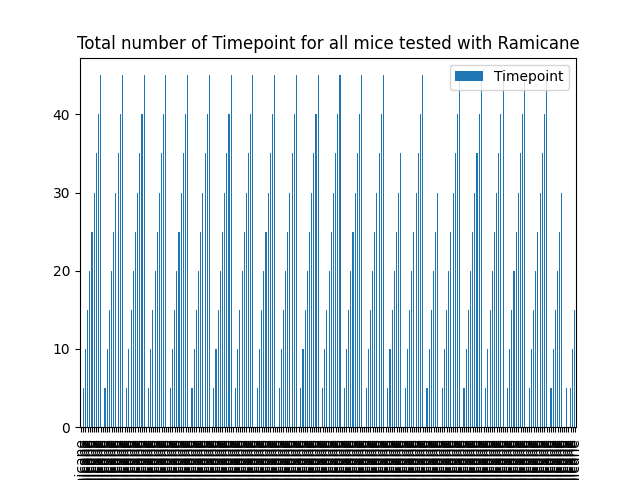

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Ramicane')

In [166]:
bar_ramicane_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ramicane")

In [167]:
Capomulin_df = Set_df.loc["Capomulin"]
Capomulin_df

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,s185,0
Capomulin,s185,5
Capomulin,s185,10
Capomulin,s185,15
Capomulin,s185,20
...,...,...
Capomulin,i557,45
Capomulin,r157,0
Capomulin,r157,5


<IPython.core.display.Javascript object>


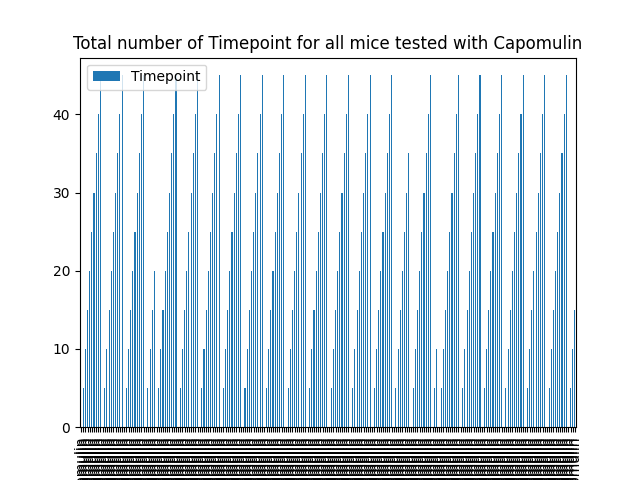

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Capomulin')

In [169]:
Capomulin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Capomulin")

In [170]:
Infubinol_df = Set_df.loc["Infubinol"]
Infubinol_df

,Mouse ID,Timepoint
Drug Regimen,,
Infubinol,a203,0
Infubinol,a203,5
Infubinol,a203,10
Infubinol,a203,15
Infubinol,a203,20
...,...,...
Infubinol,z581,25
Infubinol,z581,30
Infubinol,z581,35


<IPython.core.display.Javascript object>


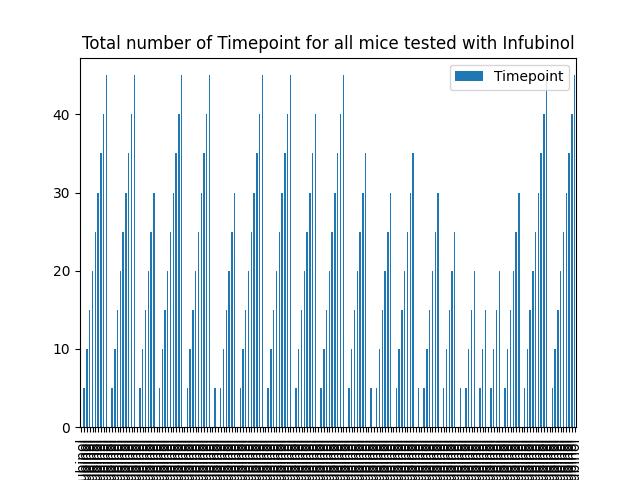

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Infubinol')

In [172]:
Infubinol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Infubinol")

In [173]:
Placebo_df = Set_df.loc["Placebo"]
Placebo_df

,Mouse ID,Timepoint
Drug Regimen,,
Placebo,a262,0
Placebo,a262,5
Placebo,a262,10
Placebo,a262,15
Placebo,a262,20
...,...,...
Placebo,y478,25
Placebo,y478,30
Placebo,y478,35


<IPython.core.display.Javascript object>


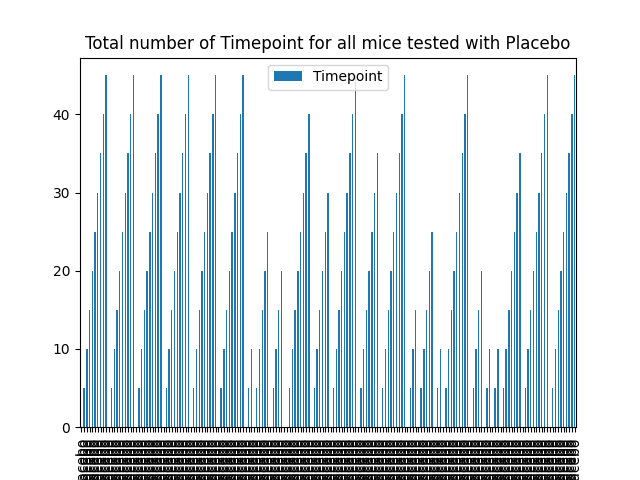

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Placebo')

In [174]:
Placebo_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Placebo")

In [175]:
Ceftamin_df = Set_df.loc["Ceftamin"]
Ceftamin_df

,Mouse ID,Timepoint
Drug Regimen,,
Ceftamin,a275,0
Ceftamin,a275,5
Ceftamin,a275,10
Ceftamin,a275,15
Ceftamin,a275,20
...,...,...
Ceftamin,y865,25
Ceftamin,y865,30
Ceftamin,y865,35


<IPython.core.display.Javascript object>


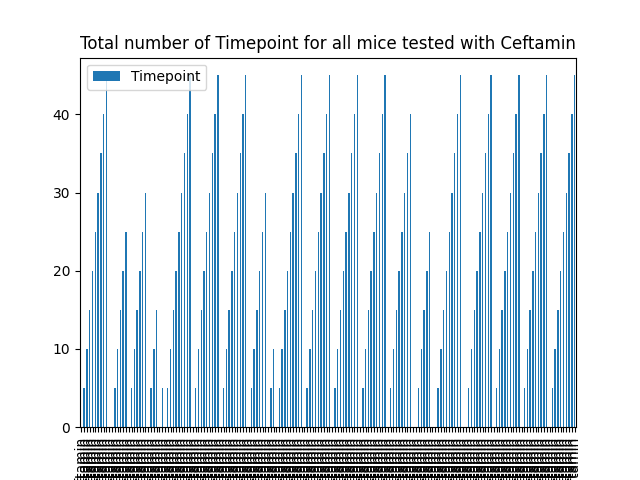

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Ceftamin')

In [176]:
Ceftamin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ceftamin")

In [177]:
Stelasyn_df = Set_df.loc["Stelasyn"]
Stelasyn_df

,Mouse ID,Timepoint
Drug Regimen,,
Stelasyn,a366,0
Stelasyn,a366,5
Stelasyn,a366,10
Stelasyn,a366,15
Stelasyn,a366,20
...,...,...
Stelasyn,x402,35
Stelasyn,x402,40
Stelasyn,x402,45


<IPython.core.display.Javascript object>


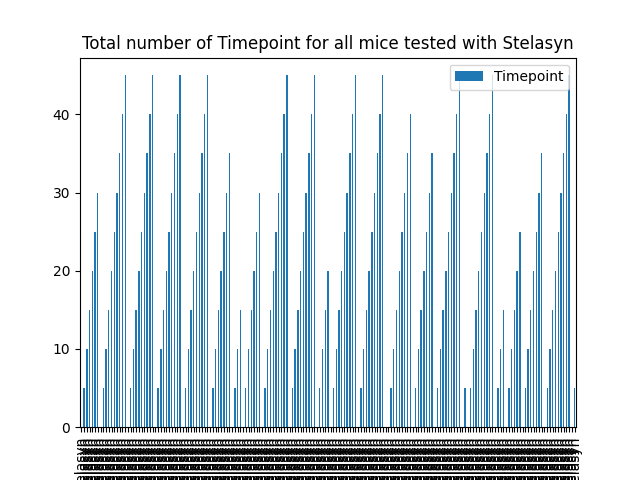

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Stelasyn')

In [178]:
Stelasyn_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Stelasyn")

In [179]:
Zoniferol_df = Set_df.loc["Zoniferol"]
Zoniferol_df

,Mouse ID,Timepoint
Drug Regimen,,
Zoniferol,a401,0
Zoniferol,a401,5
Zoniferol,a401,10
Zoniferol,a401,15
Zoniferol,a401,20
...,...,...
Zoniferol,w575,45
Zoniferol,x613,0
Zoniferol,x613,5


<IPython.core.display.Javascript object>


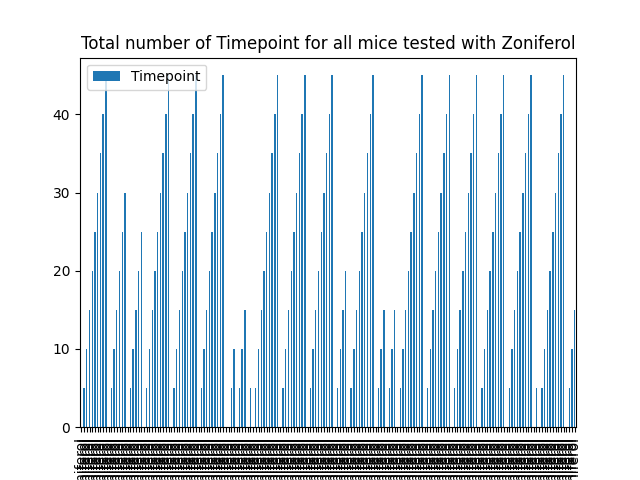

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Zoniferol')

In [180]:
Zoniferol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Zoniferol")

In [181]:
Ketapril_df = Set_df.loc["Ketapril"]
Ketapril_df

,Mouse ID,Timepoint
Drug Regimen,,
Ketapril,a457,0
Ketapril,a457,5
Ketapril,a457,10
Ketapril,c580,0
Ketapril,c580,5
...,...,...
Ketapril,y260,25
Ketapril,y260,30
Ketapril,y260,35


<IPython.core.display.Javascript object>


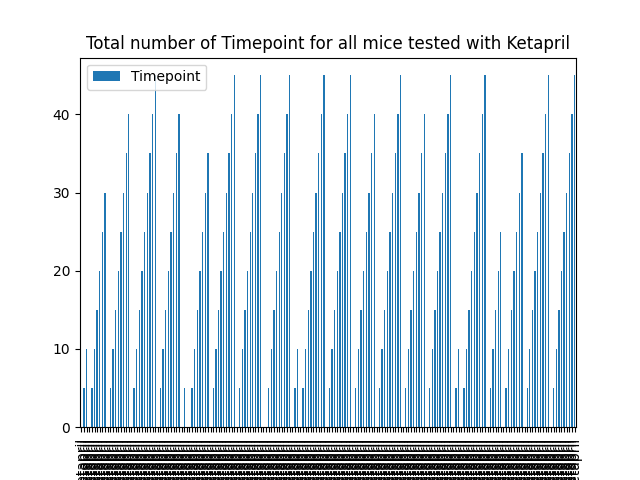

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Ketapril')

In [182]:
Ketapril_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ketapril")

In [183]:
Propriva_df = Set_df.loc["Propriva"]
Propriva_df

,Mouse ID,Timepoint
Drug Regimen,,
Propriva,a699,0
Propriva,a699,5
Propriva,a699,10
Propriva,a699,15
Propriva,a699,20
...,...,...
Propriva,x209,5
Propriva,x209,10
Propriva,z435,0


<IPython.core.display.Javascript object>


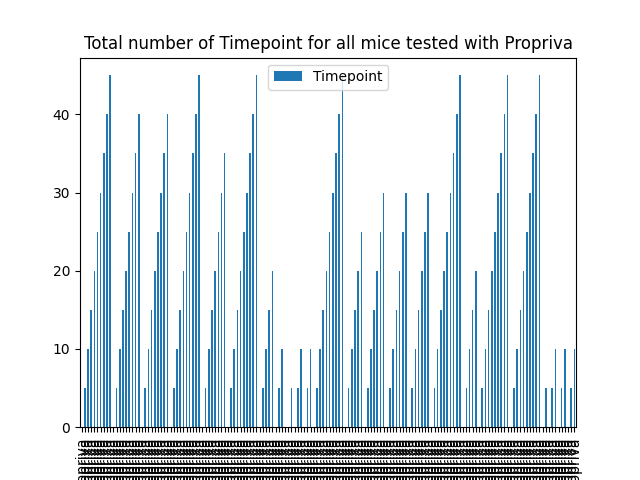

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Propriva')

In [184]:
Propriva_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Propriva")

In [185]:
Naftisol_df = Set_df.loc["Naftisol"]
Naftisol_df

,Mouse ID,Timepoint
Drug Regimen,,
Naftisol,a818,0
Naftisol,a818,5
Naftisol,a818,10
Naftisol,a818,15
Naftisol,a818,20
...,...,...
Naftisol,z969,25
Naftisol,z969,30
Naftisol,z969,35


<IPython.core.display.Javascript object>


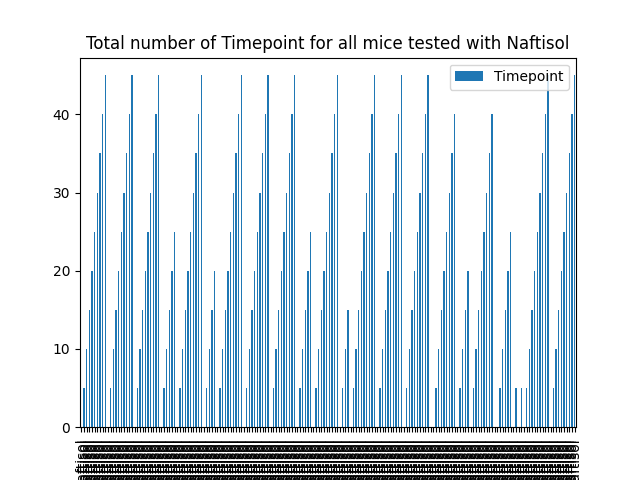

Text(0.5, 1.0, 'Total number of Timepoint for all mice tested with Naftisol')

In [186]:
Naftisol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Naftisol")

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# plot = df.plot.pie(y='mass', figsize=(5, 5)



pieplot

In [187]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [196]:
sett_df = df[["Mouse ID", "Sex"]]
sett_df

,Mouse ID,Sex
Drug Regimen,,
Ramicane,k403,Male
Ramicane,k403,Male
Ramicane,k403,Male
Ramicane,k403,Male
Ramicane,k403,Male
...,...,...
Naftisol,z969,Male
Naftisol,z969,Male
Naftisol,z969,Male


In [198]:
sett_df.groupby(['Mouse ID']).sum().plot(kind='pie', y='Sex')

TypeError: '<' not supported between instances of 'str' and 'int'

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
